# Project test

In this assignment, we are going to improve our codes in PattRecClasses and implement forward algorithm inside MarkovChain code as well as functions such as logprob and prob in Guassian in order to generate proper input values for forward algorithm.

In [1]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain, Px_calc, gauss_logprob
from matplotlib import pyplot as plt
# For the code to work you might have to pip install scipy

from CharacterFeatureExtractor import featureExtractor
from DrawCharacter import DrawCharacter

import numpy as np

# Draw character test

In [2]:
ch = DrawCharacter()
ch.run()

pts = ch.get_xybpoints()

thr = 8
feature_symbol1, sampled_symbol1 = featureExtractor(pts,thr,False)


name = input("What do you want to save the file as?")
np.save("data/"+str(name)+".npy",pts)

# WORKS!

What do you want to save the file as?squareTESST


# P test

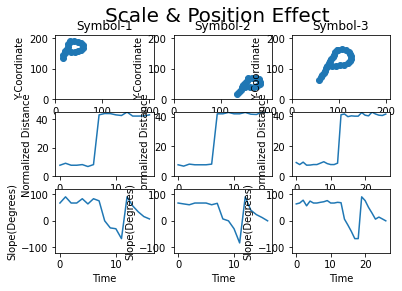

In [3]:
#Get symbol-1 (small p on top left quadrant)
dc1 = np.load("data/P_top_left.npy")

#Get symbol-2 (small p on bottom right quadrant)
dc2 = np.load("data/P_bottom_right.npy")

#Get symbol-3(twice as big p filling entire window)
dc3 = np.load("data/P_big.npy")

thr = 8 # threshold for sampling and distance normalization

# #Feature vectors are returned
feature_symbol1, sampled_symbol1 = featureExtractor(dc1,thr,False)
feature_symbol2, sampled_symbol2 = featureExtractor(dc2,thr,False)
feature_symbol3, sampled_symbol3 = featureExtractor(dc3,thr,False)


# normalized distance ,slope, and t for symbol-1
f1_symbol1 = feature_symbol1[0]
f2_symbol1 = feature_symbol1[1]
t1 = np.array(range(0,feature_symbol1.shape[1]))


# normalized distance ,slope, and t for symbol-2
f1_symbol2 = feature_symbol2[0]
f2_symbol2 = feature_symbol2[1]
t2 = np.array(range(0,feature_symbol2.shape[1]))

# normalized distance ,slope, and t for symbol-2
f1_symbol3 = feature_symbol3[0]
f2_symbol3 = feature_symbol3[1]
t3 = np.array(range(0,feature_symbol3.shape[1]))

f, axarr = plt.subplots(3, 3)
f.suptitle('Scale & Position Effect', fontsize=20)


#------------- SYMBOL DRAWINGS
#Drawing of sampled symbol-1
axarr[0, 0].scatter(sampled_symbol1[0], sampled_symbol1[1])
axarr[0, 0].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 0].set_title('Symbol-1')
axarr[0, 0].set_xlim([0,210])
axarr[0, 0].set_ylim([0,210])

#Drawing of sampled symbol-2
axarr[0, 1].scatter(sampled_symbol2[0], sampled_symbol2[1])
axarr[0, 1].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 1].set_title('Symbol-2')
axarr[0, 1].set_xlim([0,210])
axarr[0, 1].set_ylim([0,210])

#Drawing of sampled symbol-3
axarr[0, 2].scatter(sampled_symbol3[0], sampled_symbol3[1])
axarr[0, 2].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 2].set_title('Symbol-3')
axarr[0, 2].set_xlim([0,210])
axarr[0, 2].set_ylim([0,210])

#------------- ABSOLUTE DISTANCE FEATURE

#Absolute distance plot of symbol-1
axarr[1, 0].plot(t1, f1_symbol1)
axarr[1, 0].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 0].set_ylim([0,np.max(f1_symbol1)])

#Absolute distance plot of symbol-2
axarr[1, 1].plot(t2, f1_symbol2)
axarr[1, 1].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 1].set_ylim([0,np.max(f1_symbol2)])

#Absolute distance plot of symbol-3
axarr[1, 2].plot(t3, f1_symbol3)
axarr[1, 2].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 2].set_ylim([0,np.max(f1_symbol3)])

#------------- SLOPE FEATURE

#Y-wise distance plot of symbol-1
axarr[2, 0].plot(t1, f2_symbol1)
axarr[2, 0].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 0].set_ylim([-120,120])

#Y-wise distance plot of symbol-2
axarr[2, 1].plot(t2, f2_symbol2)
axarr[2, 1].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 1].set_ylim([-120,120])

#Y-wise distance plot of symbol-3
axarr[2, 2].plot(t3, f2_symbol3)
axarr[2, 2].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 2].set_ylim([-120,120])

plt.savefig('fig/P_test.png', bbox_inches='tight', dpi = 300)
